In [ ]:
### Step 1: Load and Explore Dataset
We load the Wine Quality dataset and display the first few rows to understand the structure.

In [5]:
import requests
import os

# Create the data folder if it doesn't exist
data_folder = "../data"
os.makedirs(data_folder, exist_ok=True)

# Dataset URL and output file path
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
output_file = os.path.join(data_folder, "winequality-red.csv")

# Download and save the dataset
response = requests.get(url)
with open(output_file, 'wb') as file:
    file.write(response.content)

print(f"Dataset downloaded and saved at {output_file}")

Dataset downloaded and saved at ../data/winequality-red.csv


In [5]:
!pip install pandas seaborn matplotlib numpy

In [7]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

In [9]:
import pandas as pd
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.2.2


In [11]:
data = pd.read_csv("../data/winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
### Step 2: Exploratory Data Analysis (EDA)
In this step, we analyze the dataset to identify missing values, understand the distribution of features, and explore relationships with the target variable `quality`.

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

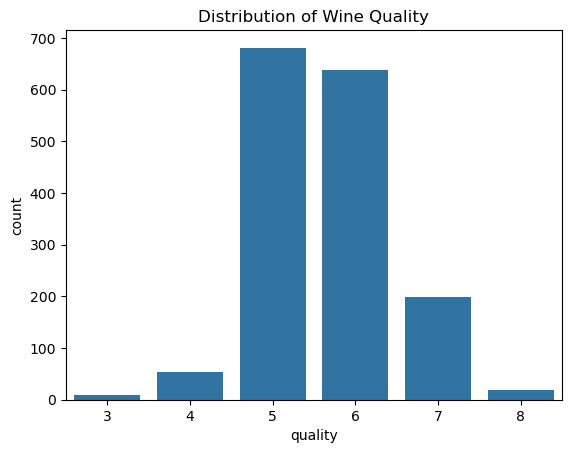

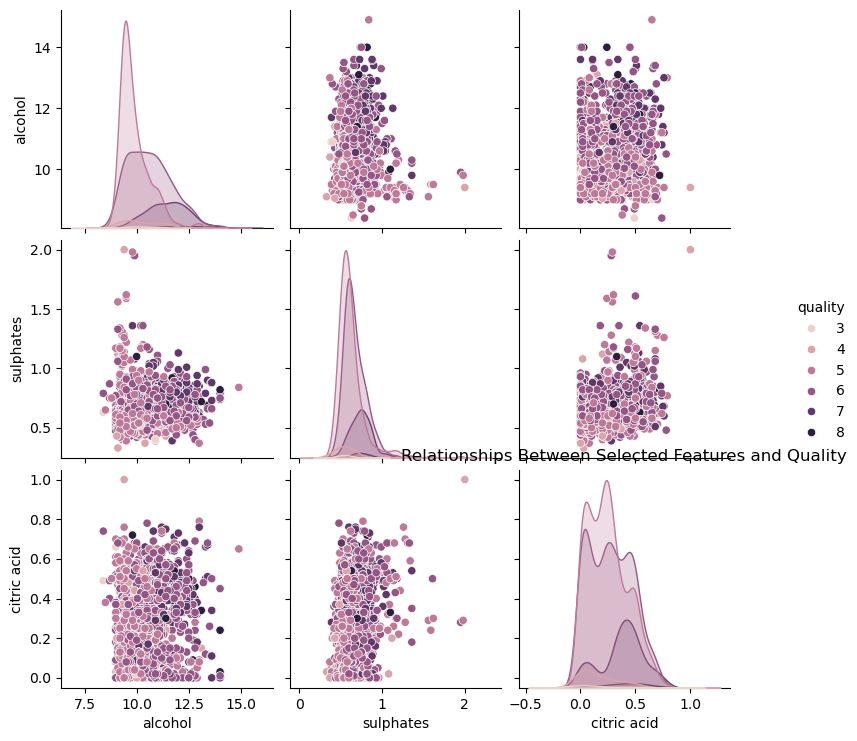

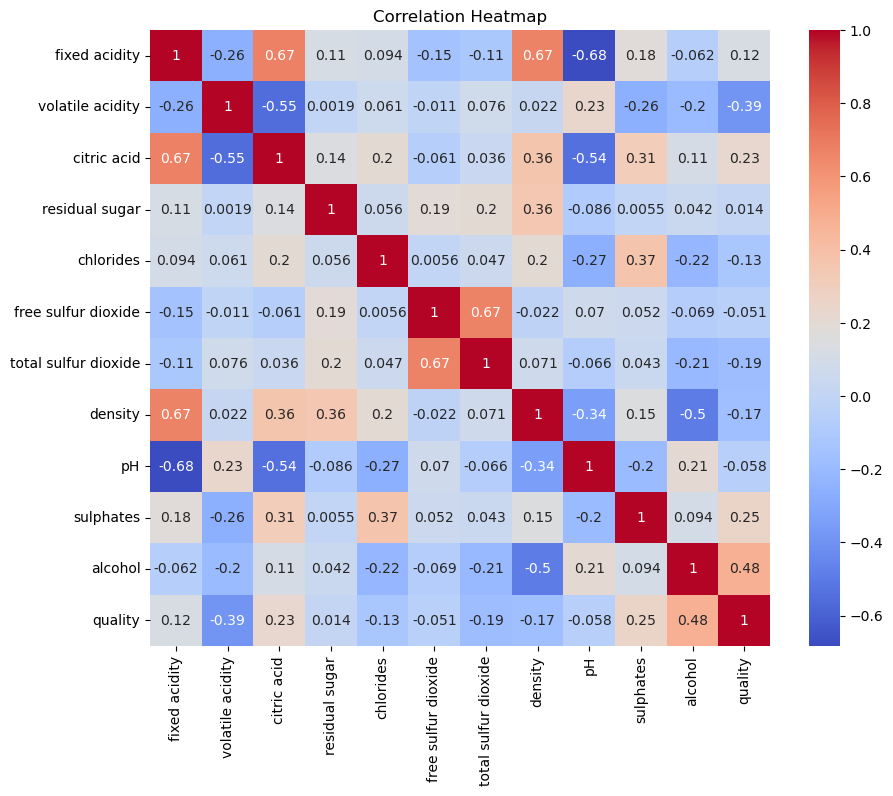

In [13]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Summary statistics of numerical features
print("\nSummary Statistics:")
print(data.describe())

# Distribution of the target variable
sns.countplot(x="quality", data=data)
plt.title("Distribution of Wine Quality")
plt.show()

# Pairplot of selected features
selected_features = ["quality", "alcohol", "sulphates", "citric acid"]
sns.pairplot(data[selected_features], hue="quality", diag_kind="kde")
plt.title("Relationships Between Selected Features and Quality")
plt.show()

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
### Step 3: Simulated Database and SQL Operations
In this step, we simulate SQL operations by splitting the dataset into separate tables and performing joins.

In [15]:
# Save a portion of the dataset as separate CSVs (simulating separate database tables)
data[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']].to_csv("../data/wine_features.csv", index=False)
data[['quality']].to_csv("../data/wine_labels.csv", index=False)

# Load and join the tables
wine_features = pd.read_csv("../data/wine_features.csv")
wine_labels = pd.read_csv("../data/wine_labels.csv")

# Simulate an SQL join
wine_data_joined = pd.concat([wine_features, wine_labels], axis=1)

# Display the joined data
print(wine_data_joined.head())

   fixed acidity  volatile acidity  citric acid  alcohol  quality
0            7.4              0.70         0.00      9.4        5
1            7.8              0.88         0.00      9.8        5
2            7.8              0.76         0.04      9.8        5
3           11.2              0.28         0.56      9.8        6
4            7.4              0.70         0.00      9.4        5


In [ ]:
### Step 4: Data Preprocessing Using Pipelines
In this step, we preprocess the dataset by scaling the numerical features to standardize them.

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target
X = wine_data_joined.drop("quality", axis=1)
y = wine_data_joined["quality"]

# Define numerical features for scaling
numerical_features = X.columns.tolist()

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
print(X_train_scaled[:5])

Scaled Training Data:
[[ 0.21833164  0.88971201  0.19209222  1.12317723]
 [-1.29016623 -1.78878251  0.65275338  1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 -0.58738978]
 [ 0.27635078  0.86181102 -0.06383064 -0.96751578]
 [ 0.04427419  2.81487994 -0.62686095 -0.49235828]]


In [ ]:
### Step 5: Model Training and Evaluation
In this step, we train a Random Forest classifier to predict wine quality and evaluate its performance.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Test set predictions
y_pred = model.predict(X_test_scaled)

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.62890625 0.67578125 0.6015625  0.640625   0.67058824]
Mean Cross-Validation Accuracy: 0.6434926470588235

Classification Report on Test Set:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.10      0.17        10
           5       0.74      0.77      0.75       130
           6       0.66      0.67      0.66       132
           7       0.55      0.57      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.41      0.35      0.36       320
weighted avg       0.66      0.67      0.66       320



In [ ]:
### Step 6.1: Save the Trained Model
We save the trained Random Forest model to the outputs folder for reuse.

In [21]:
import pandas as pd

# Load the split datasets
wine_features = pd.read_csv("../data/wine_features.csv")
wine_labels = pd.read_csv("../data/wine_labels.csv")

# Simulate SQL join by combining the datasets
wine_data_joined = pd.concat([wine_features, wine_labels], axis=1)

# Display the first few rows to verify
print(wine_data_joined.head())

   fixed acidity  volatile acidity  citric acid  alcohol  quality
0            7.4              0.70         0.00      9.4        5
1            7.8              0.88         0.00      9.8        5
2            7.8              0.76         0.04      9.8        5
3           11.2              0.28         0.56      9.8        6
4            7.4              0.70         0.00      9.4        5


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target (y)
X = wine_data_joined.drop("quality", axis=1)
y = wine_data_joined["quality"]

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ]
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


In [25]:
import joblib

# Save the trained model
model_path = "../outputs/wine_quality_model.joblib"
joblib.dump(model, model_path)
print(f"Model saved at {model_path}")

Model saved at ../outputs/wine_quality_model.joblib


In [2]:
pip install mlflow scikit-learn numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 32.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 18.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost scikit-learn mlflow pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd

# Load the dataset using the correct absolute path
dataset_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_features.csv"
data = pd.read_csv(dataset_path)

# Print columns for verification
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [12]:
import pandas as pd

# Paths to the datasets
features_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_features.csv"
labels_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_labels.csv"

# Load features and labels
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# Check the structure of the labels file
print("Labels columns:", labels.columns)

# Ensure there is a column to merge on (e.g., 'id')
if 'id' in features.columns and 'id' in labels.columns:
    data = features.merge(labels, on='id')
else:
    # If there's no 'id' column, concatenate the files assuming correct alignment
    data = pd.concat([features, labels], axis=1)

# Verify the final dataset
print("Final dataset columns:", data.columns)

Labels columns: Index(['quality'], dtype='object')
Final dataset columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [16]:
if 'quality' not in data.columns:
    raise ValueError("The target column 'quality' is missing in the dataset.")

In [18]:
import pandas as pd
import mlflow

# Paths to the datasets
features_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_features.csv"
labels_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_labels.csv"

# Load features and labels
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# Check for an ID column for merging
if "id" in features.columns and "id" in labels.columns:
    data = features.merge(labels, on="id")
else:
    # Concatenate datasets assuming alignment
    data = pd.concat([features, labels], axis=1)

print("Final dataset columns:", data.columns)

# Ensure the target column exists
if "quality" not in data.columns:
    raise ValueError(f"The target column 'quality' is missing in the dataset. Columns found: {data.columns}")

Final dataset columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [20]:
import pandas as pd

# Paths to the datasets
features_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_features.csv"
labels_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_labels.csv"

# Load features and labels
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# Check if a common column exists for merging (e.g., 'id')
if "id" in features.columns and "id" in labels.columns:
    data = features.merge(labels, on="id")
else:
    # If no common column, assume rows are aligned and concatenate
    data = pd.concat([features, labels], axis=1)

# Verify the dataset
print("Final dataset columns:", data.columns)

# Ensure the target column is present
if "quality" not in data.columns:
    raise ValueError("The target column 'quality' is missing in the dataset.")

# Define features and target
X = data.drop("quality", axis=1)
y = data["quality"]

Final dataset columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [22]:
import pandas as pd

# Paths to your datasets
features_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_features.csv"
labels_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_labels.csv"

# Load datasets
features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

# Check the structure of the files
print("Features columns:", features.columns)
print("Labels columns:", labels.columns)

# Merge or concatenate datasets to include the 'quality' column
if "id" in features.columns and "id" in labels.columns:
    data = features.merge(labels, on="id")  # Merge if a common column exists
else:
    # Assuming aligned rows, concatenate features and labels
    data = pd.concat([features, labels], axis=1)

# Check final structure
print("Final dataset columns:", data.columns)

# Ensure the 'quality' column exists
if "quality" not in data.columns:
    raise ValueError("The target column 'quality' is missing in the dataset.")

# Split features and target
X = data.drop("quality", axis=1)
y = data["quality"]

# Print confirmation
print("Data preparation complete!")

Features columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Labels columns: Index(['quality'], dtype='object')
Final dataset columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Data preparation complete!


In [25]:
pip install pandas sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
Note: you may need to restart the kernel to use updated packages.


In [27]:
import sqlite3

# Connect to the SQLite database
db_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"
conn = sqlite3.connect(db_path)

# Check the schema of the 'wine_features' table
cursor = conn.execute("PRAGMA table_info(wine_features)")
print("Schema of 'wine_features':")
for column in cursor.fetchall():
    print(column)

# Drop the table if needed
drop_table = input("Do you want to drop the 'wine_features' table? (yes/no): ").strip().lower()
if drop_table == "yes":
    conn.execute("DROP TABLE IF EXISTS wine_features")
    print("Dropped the 'wine_features' table.")

conn.close()

Schema of 'wine_features':


Do you want to drop the 'wine_features' table? (yes/no):  yes


Dropped the 'wine_features' table.


In [29]:
import sqlite3
conn = sqlite3.connect('/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
conn.close()

[('wine_features',), ('wine_quality',)]


In [31]:
import sqlite3

# Path to your SQLite database
db_path = '/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db'

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

conn.close()

Tables in the database: [('wine_features',), ('wine_quality',)]


In [33]:
import sqlite3

# Path to your SQLite database
db_path = '/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db'

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Check the schema of the table
cursor.execute("PRAGMA table_info(wine_features);")
schema = cursor.fetchall()
print("Schema of 'wine_features':")
for col in schema:
    print(col)

conn.close()

Schema of 'wine_features':
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'fixed_acidity', 'REAL', 0, None, 0)
(2, 'volatile_acidity', 'REAL', 0, None, 0)
(3, 'citric_acid', 'REAL', 0, None, 0)
(4, 'residual_sugar', 'REAL', 0, None, 0)
(5, 'chlorides', 'REAL', 0, None, 0)
(6, 'free_sulfur_dioxide', 'REAL', 0, None, 0)
(7, 'total_sulfur_dioxide', 'REAL', 0, None, 0)
(8, 'density', 'REAL', 0, None, 0)
(9, 'pH', 'REAL', 0, None, 0)
(10, 'sulphates', 'REAL', 0, None, 0)
(11, 'alcohol', 'REAL', 0, None, 0)


In [35]:
import sqlite3

db_path = '/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db'
conn = sqlite3.connect(db_path)

query = "SELECT COUNT(*) FROM wine_features;"
cursor = conn.execute(query)
row_count = cursor.fetchone()[0]
print(f"Number of rows in 'wine_features': {row_count}")

conn.close()

Number of rows in 'wine_features': 0


In [37]:
import sqlite3

# Database path
db_path = '/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db'
conn = sqlite3.connect(db_path)

# Count rows
query = "SELECT COUNT(*) FROM wine_features;"
cursor = conn.execute(query)
row_count = cursor.fetchone()[0]
print(f"Number of rows in 'wine_features': {row_count}")

conn.close()

Number of rows in 'wine_features': 0


In [39]:
import sqlite3

def list_tables(db_path):
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        conn.close()
        return tables
    except Exception as e:
        return f"Error: {e}"

# Check wine_data.db
db_path_data = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"
print(f"Tables in {db_path_data}: {list_tables(db_path_data)}")

# Check wine_quality.db
db_path_quality = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db"
print(f"Tables in {db_path_quality}: {list_tables(db_path_quality)}")

Tables in /Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db: [('wine_features',)]
Tables in /Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_quality.db: [('wine_features',), ('wine_quality',)]


In [41]:
import sqlite3
import pandas as pd

# Path to database
db_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Query to count rows in wine_features table
query = "SELECT COUNT(*) FROM wine_features;"
try:
    cursor = conn.cursor()
    cursor.execute(query)
    count = cursor.fetchone()[0]
    print(f"Number of rows in 'wine_features': {count}")
    conn.close()
except Exception as e:
    print(f"Error: {e}")
    conn.close()


Number of rows in 'wine_features': 1599


In [43]:
import sqlite3
import pandas as pd
from ydata_profiling import ProfileReport

# Path to SQLite database
db_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"

# Establish connection
conn = sqlite3.connect(db_path)

# SQL Query to fetch data
query = "SELECT * FROM wine_features;"

# Fetch data
data = pd.read_sql_query(query, conn)

# Debug: Check if the DataFrame is empty
print(data.head())
print(f"Number of rows in the DataFrame: {len(data)}")

# Generate profiling report if the DataFrame is not empty
if len(data) > 0:
    print("Generating data profile report...")
    profile = ProfileReport(data, title="Wine Features Profile Report", explorative=True)
    profile.to_file("wine_features_profile.html")
    print("Data profile report generated: wine_features_profile.html")
else:
    raise ValueError("DataFrame is empty. Please provide a non-empty DataFrame.")

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
Number o

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profile report generated: wine_features_profile.html


KeyError: 'quality'

In [47]:
import sqlite3

# Connect to the SQLite database
db_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"
conn = sqlite3.connect(db_path)

# Query to check schema
schema_query = "PRAGMA table_info(wine_features)"
schema = conn.execute(schema_query).fetchall()
conn.close()

# Print schema
print("Schema of 'wine_features':")
for col in schema:
    print(col)

Schema of 'wine_features':
(0, 'fixed acidity', 'REAL', 0, None, 0)
(1, 'volatile acidity', 'REAL', 0, None, 0)
(2, 'citric acid', 'REAL', 0, None, 0)
(3, 'residual sugar', 'REAL', 0, None, 0)
(4, 'chlorides', 'REAL', 0, None, 0)
(5, 'free sulfur dioxide', 'REAL', 0, None, 0)
(6, 'total sulfur dioxide', 'REAL', 0, None, 0)
(7, 'density', 'REAL', 0, None, 0)
(8, 'pH', 'REAL', 0, None, 0)
(9, 'sulphates', 'REAL', 0, None, 0)
(10, 'alcohol', 'REAL', 0, None, 0)


In [49]:
import sqlite3
import pandas as pd

# Paths to the CSV files and database
features_csv_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_features.csv"
labels_csv_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_labels.csv"
db_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"

# Read the features and labels
features = pd.read_csv(features_csv_path)
labels = pd.read_csv(labels_csv_path)

# Merge features and labels into a single DataFrame
features["quality"] = labels["quality"]

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Drop the 'wine_features' table if it exists
conn.execute("DROP TABLE IF EXISTS wine_features")

# Write the merged DataFrame to the database
features.to_sql("wine_features", conn, if_exists="replace", index=False)

conn.close()
print("Normalization complete. 'wine_features' table updated with 'quality' column.")

Normalization complete. 'wine_features' table updated with 'quality' column.


In [51]:
conn = sqlite3.connect(db_path)

schema_query = "PRAGMA table_info(wine_features)"
schema = conn.execute(schema_query).fetchall()
conn.close()

print("Schema of 'wine_features' after update:")
for col in schema:
    print(col)

Schema of 'wine_features' after update:
(0, 'fixed acidity', 'REAL', 0, None, 0)
(1, 'volatile acidity', 'REAL', 0, None, 0)
(2, 'citric acid', 'REAL', 0, None, 0)
(3, 'residual sugar', 'REAL', 0, None, 0)
(4, 'chlorides', 'REAL', 0, None, 0)
(5, 'free sulfur dioxide', 'REAL', 0, None, 0)
(6, 'total sulfur dioxide', 'REAL', 0, None, 0)
(7, 'density', 'REAL', 0, None, 0)
(8, 'pH', 'REAL', 0, None, 0)
(9, 'sulphates', 'REAL', 0, None, 0)
(10, 'alcohol', 'REAL', 0, None, 0)
(11, 'quality', 'INTEGER', 0, None, 0)


In [67]:
import pandas as pd

conn = sqlite3.connect(db_path)
data = pd.read_sql_query("SELECT * FROM wine_features", conn)
conn.close()

# Check the distribution of the 'quality' column
quality_counts = data['quality'].value_counts().sort_index()
print("Quality Distribution:")
print(quality_counts)

Quality Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [69]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
db_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/data/wine_data.db"
conn = sqlite3.connect(db_path)

# Load data
data = pd.read_sql_query("SELECT * FROM wine_features", conn)
conn.close()

# Check the distribution of the 'quality' column
quality_counts = data['quality'].value_counts().sort_index()
print("Quality Distribution:")
print(quality_counts)

Quality Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [71]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Wine Features with Quality Profile Report", explorative=True)
profile_path = "/Users/lohithvattikuti/Desktop/Wine_Quality_project/notebooks/wine_features_with_quality_profile.html"
profile.to_file(profile_path)
print(f"Data profile report generated: {profile_path}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profile report generated: /Users/lohithvattikuti/Desktop/Wine_Quality_project/notebooks/wine_features_with_quality_profile.html


In [73]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data.drop(columns=["quality"])
y = data["quality"]

# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Stratified Train/Test split complete.")

Stratified Train/Test split complete.


In [81]:
quality_counts = data['quality'].value_counts().sort_index()
print(quality_counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [83]:
quality_proportions = quality_counts / quality_counts.sum()
print(quality_proportions)

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: count, dtype: float64


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train Distribution:\n", y_train.value_counts(normalize=True))
print("Test Distribution:\n", y_test.value_counts(normalize=True))

Train Distribution:
 quality
5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: proportion, dtype: float64
Test Distribution:
 quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: proportion, dtype: float64


In [2]:
import mlflow
import pandas as pd

# Set tracking URI
mlflow.set_tracking_uri("https://dagshub.com/vattikutilohith/wine_quality_project.mlflow")

# List of missing experiment names
experiment_names = ["Experiment #3", "Experiment #4", "PCA - Experiment #5"]

# Check runs and metrics
for exp_name in experiment_names:
    print(f"Checking {exp_name}...")
    experiment = mlflow.get_experiment_by_name(exp_name)
    if experiment:
        experiment_id = experiment.experiment_id
        runs = mlflow.search_runs(experiment_ids=[experiment_id])
        if not runs.empty:
            print(f"Found runs for {exp_name}:")
            for _, run in runs.iterrows():
                print(f"Run ID: {run['run_id']}")
                print("Metrics logged:")
                print(run.filter(like="metrics").dropna())  # Show all metrics
        else:
            print(f"No runs found for {exp_name}.")
    else:
        print(f"Experiment {exp_name} not found.")

Checking Experiment #3...
Experiment Experiment #3 not found.
Checking Experiment #4...
Experiment Experiment #4 not found.
Checking PCA - Experiment #5...
Experiment PCA - Experiment #5 not found.
